In [40]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Read the files

In [14]:
test=pd.read_csv('test_group_csv.csv')
population=pd.read_csv('complete_population_csv.csv')

In [15]:

test.index=test['custid']
test.drop(['custid'],axis=1,inplace=True)
test.head()


,spend_1m,visit_6m,spend_6m,items_6m
custid,,,,
10001,452,30,1808,300
10002,117,17,351,119
10003,394,6,2364,36
10004,251,2,1004,12
10005,343,34,1029,204


In [16]:
population.index=population['custid']
population.drop(['custid'],axis=1,inplace=True)
population.head()

,spend_1m,visit_6m,spend_6m,items_6m
custid,,,,
10001,452,30,1808,300
10002,117,17,351,119
10003,394,6,2364,36
10004,251,2,1004,12
10005,343,34,1029,204


## Removing test group from complete population 

In [17]:
# population_1=population.loc[[1,2,18]]
test_unique=list(test.index.unique())

population_1=population.drop(test_unique)
population_1.head()

,spend_1m,visit_6m,spend_6m,items_6m
custid,,,,
11001,54,43,216,430
11002,429,32,2145,192
11003,11,16,66,144
11004,10,45,40,360
11005,434,49,1302,441


## KNN algorithm implementation

In [18]:
def pair_algo(treated_df, non_treated_df):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values

    
    scaler = StandardScaler()

    
    scaler.fit(treated_x)
    treated_x = scaler.transform(treated_x)
    non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

matched_df = pair_algo(test, population_1)

In [19]:


# fig, ax = plt.subplots(figsize=(6,6))
# plt.scatter(population_1['spend_1m'], population_1['visit_6m'], alpha=0.3, )
# plt.scatter(test['spend_1m'], test['visit_6m'], label='Treated')
# plt.scatter(matched_df['spend_1m'], matched_df['visit_6m'], marker='x', label='matched')
# plt.legend()
# plt.xlim(-1,2)

## Final match pair dataset

In [20]:
test.head()

,spend_1m,visit_6m,spend_6m,items_6m
custid,,,,
10001,452,30,1808,300
10002,117,17,351,119
10003,394,6,2364,36
10004,251,2,1004,12
10005,343,34,1029,204


In [38]:
final_test_cnt=pd.concat([pd.DataFrame(list(test.index),columns=['test']),
                         pd.DataFrame(list(matched_df.index),columns=['control'])],axis=1)




In [39]:
final_test_cnt

,test,control
0,10001,12882
1,10002,13298
2,10003,14931
3,10004,12550
4,10005,11671
...,...,...
995,10996,12946
996,10997,13086
997,10998,14985
998,10999,14274


## Ploting the pairs 

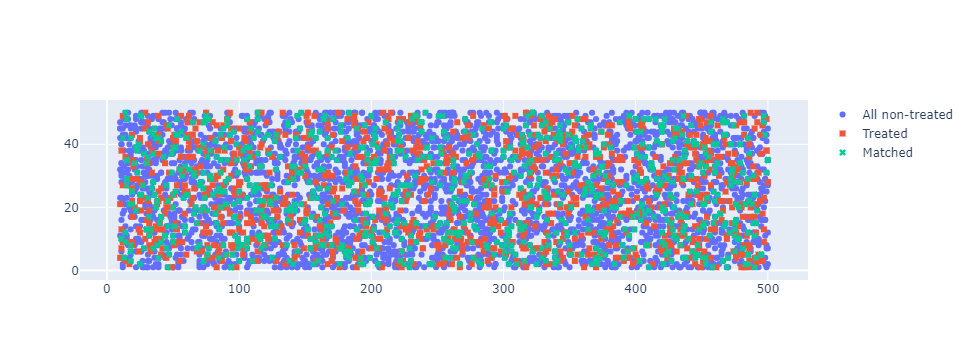

In [37]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=population_1['spend_1m'], y=population_1['visit_6m'],
                    mode='markers',
                    name='All non-treated',hovertext=population_1.index))
fig.add_trace(go.Scatter(x=test['spend_1m'], y=test['visit_6m'],
                    mode='markers',hovertext=test.index,
                    name='Treated',marker_symbol='square'))

fig.add_trace(go.Scatter(x=matched_df['spend_1m'], y=matched_df['visit_6m'],
                    mode='markers',hovertext=matched_df.index,
                    name='Matched',marker_symbol='x'))

fig.show()

In [24]:
population_1.head()

,spend_1m,visit_6m,spend_6m,items_6m
custid,,,,
11001,54,43,216,430
11002,429,32,2145,192
11003,11,16,66,144
11004,10,45,40,360
11005,434,49,1302,441


In [25]:
import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d([population_1['spend_1m'], population_1['visit_6m'],population_1['spend_6m']])
# fig = px.scatter_3d(data_frame=population_1,x='spend_1m',y='visit_6m',z='spend_6m')

# fig =fig+ px.scatter_3d(data_frame=test,x='spend_1m',y='visit_6m',z='spend_6m')
# fig = fig+ px.scatter_3d(data_frame=matched_df,x='spend_1m',y='visit_6m',z='spend_6m')

# fig.show()

## Generate basic stats for test and control group

In [26]:
matched_df.describe()

,spend_1m,visit_6m,spend_6m,items_6m
count,1000.000000,1000.0000,1000.000000,1000.000000
mean,258.289000,24.5180,1039.550000,183.986000
std,145.160342,14.2311,729.341326,117.285821
min,11.000000,1.0000,24.000000,6.000000
25%,124.750000,12.0000,458.750000,83.250000
50%,261.000000,24.0000,876.000000,175.000000
75%,389.000000,37.0000,1526.250000,259.000000
max,500.000000,50.0000,2916.000000,500.000000


In [27]:
test.describe()

,spend_1m,visit_6m,spend_6m,items_6m
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,258.867000,24.541000,1040.683000,183.896000
std,145.355597,14.264214,731.131122,117.599357
min,10.000000,1.000000,22.000000,5.000000
25%,126.750000,12.000000,464.000000,85.000000
50%,261.500000,24.000000,887.000000,175.000000
75%,386.000000,37.000000,1514.000000,261.000000
max,500.000000,50.000000,3000.000000,500.000000


## T-Test to validate if the control group is replica of test group and is statisticaly significant

In [30]:
from scipy import stats

In [36]:
x=list(test.columns)
l=len(x)
stats_data=[]
for i in range(l):
    
    t_value,p_value=stats.ttest_ind(test[x[i]],matched_df[x[i]])
    stats_data.append([x[i],t_value,p_value])

stats_data=pd.DataFrame(stats_data,columns=['var','t-test','p-value'])
def f1(x):
    if x>0.05:
        return('Pass at 95% confidence interval')
    elif x>0.1:
        return('Pass at 90% confidence interval')
    elif x>0.15:
        return('Pass at 80% confidence interval')
    else:
        return('Fail')
        
    
stats_data['Result']=stats_data['p-value'].apply(f1)
# stats_data['Result_90CI']=stats_data['p-value'].apply(f1)
stats_data   
    

,var,t-test,p-value,Result
0,spend_1m,0.088976,0.929110,Pass at 95% confidence interval
1,visit_6m,0.036097,0.971209,Pass at 95% confidence interval
2,spend_6m,0.034694,0.972327,Pass at 95% confidence interval
3,items_6m,-0.017136,0.986330,Pass at 95% confidence interval


## Download final file

In [43]:
# pd.write_
final_test_cnt.to_csv('test_cnt_match_pair.csv',index=False)